# (1+1)-ES Algorithm
Task: Implement a (1+1)-ES and test it on the benchmark set in the appendix for
N = 5, 10, 20 dimensions, each with 100 repetitions What is the influence of the
problem dimensions.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = np.random.randn(20)
print(x)

[-0.27262978 -1.52479502  1.11350814  0.18825821  0.31511374 -1.50777196
  0.65935525  0.92081521  1.35818492  0.93118384  0.20025545  0.39993962
  2.09109877 -0.23602047  0.16749871  0.49231081  1.34257306 -0.22526175
  0.12412252  1.40171689]


In [17]:
# Step 1: Implement the (1+1)-ES Algorithm
def one_plus_one_es(dim, objective_function, sigma=0.01, iterations=1000):
    # Initialize the solution randomly
    x = np.random.randn(dim)
    # Track the best solution and its objective value
    best_x = x
    best_obj = objective_function(x)
    log = np.zeros(iterations)  # Log of best objective value at each iteration

    for _ in range(iterations):
        # Mutate the solution
        x_mutated = x + np.random.normal(0, sigma, dim)
        # Evaluate the objective function for the mutated solution
        obj_mutated = objective_function(x_mutated)
        
        # Selection step: if the mutated solution is better, replace the current solution with it
        if obj_mutated < best_obj:
            x = x_mutated
            best_x = x_mutated
            best_obj = obj_mutated
        log[_] = best_obj
    return best_x, best_obj, log

In [18]:
# Step 2: Define Benchmark Functions
def sphere_function(x):
    return np.sum(x**2)

def rastrigin_function(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

In [19]:
# Experiment Parameters
dimensions = [5, 10, 20]
repetitions = 100
iterations = 1000
sigma = 0.01
results = {}
fitness_logs = {}

# Step 3: Experiment Setup
for dim in dimensions:
    results[dim] = {'Sphere': [], 'Rastrigin': []}
    fitness_logs[dim] = {'Sphere': [], 'Rastrigin': []}
    for _ in range(repetitions):
        # Sphere Function
        _, obj_sphere, log_sphere = one_plus_one_es(dim, sphere_function, sigma, iterations)
        results[dim]['Sphere'].append(obj_sphere)
        fitness_logs[dim]['Sphere'].append(log_sphere)

        # Rastrigin Function
        _, obj_rastrigin, log_rastrigin = one_plus_one_es(dim, rastrigin_function, sigma, iterations)
        results[dim]['Rastrigin'].append(obj_rastrigin)
        fitness_logs[dim]['Rastrigin'].append(log_rastrigin)

# Display initial results
results[dim]['Sphere'][:5], results[dim]['Rastrigin'][:5]
fitness_logs[dim]['Sphere'][:5], fitness_logs[dim]['Rastrigin'][:5]

([array([14.5631759 , 14.5631759 , 14.5631759 , 14.5631759 , 14.5631759 ,
         14.5631759 , 14.5631759 , 14.5631759 , 14.5631759 , 14.5631759 ,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 13.63227084, 13.63227084, 13.63227084, 13.63227084,
         13.63227084, 11.44373416, 11.44373416, 11.44373416, 11.44373416,
         11.44373416, 11.44373416, 11.44373416, 11.44373416, 11.44373416,
         11.44373416, 11.44373416, 11.44373416, 11.44373416, 11.44373416,
         11.44373416, 11.44373416, 11.

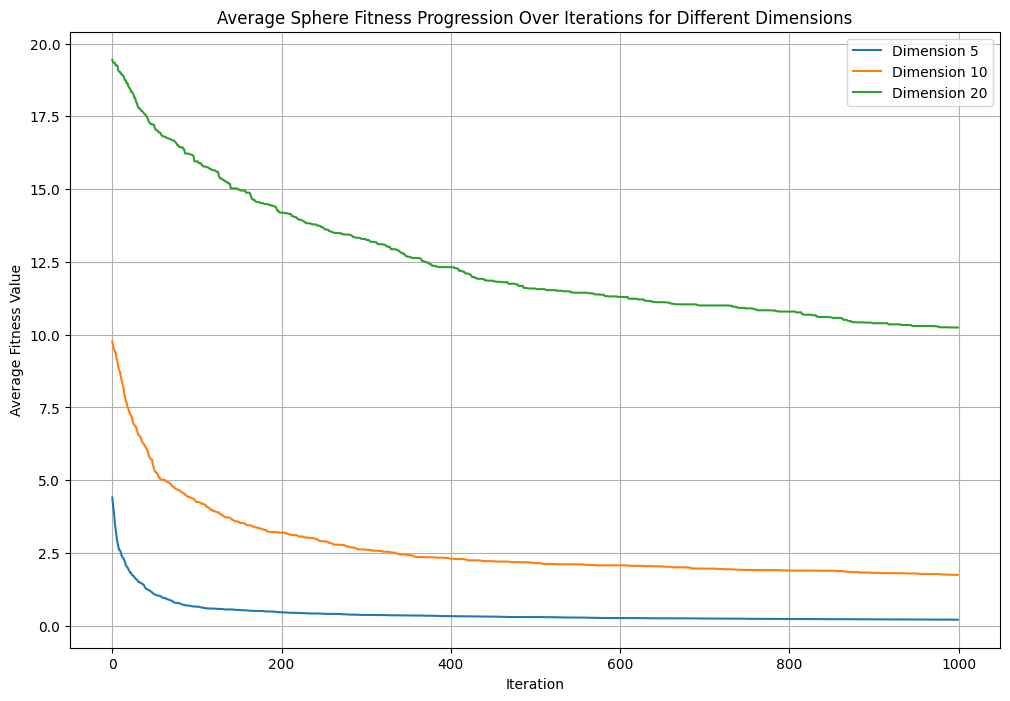

In [20]:
def plot_average_fitness_progression(logs, dimensions, fittype='Sphere'):
    plt.figure(figsize=(12, 8))
    
    for dim in dimensions:
        # Calculate the mean fitness progression for each dimension
        mean_progression = np.mean(logs[dim][fittype], axis=0)
        plt.plot(mean_progression, label=f'Dimension {dim}')
    
    plt.xlabel('Iteration')
    plt.ylabel('Average Fitness Value')
    plt.title(f'Average {fittype} Fitness Progression Over Iterations for Different Dimensions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_fitness_progression(fitness_logs, dimensions)

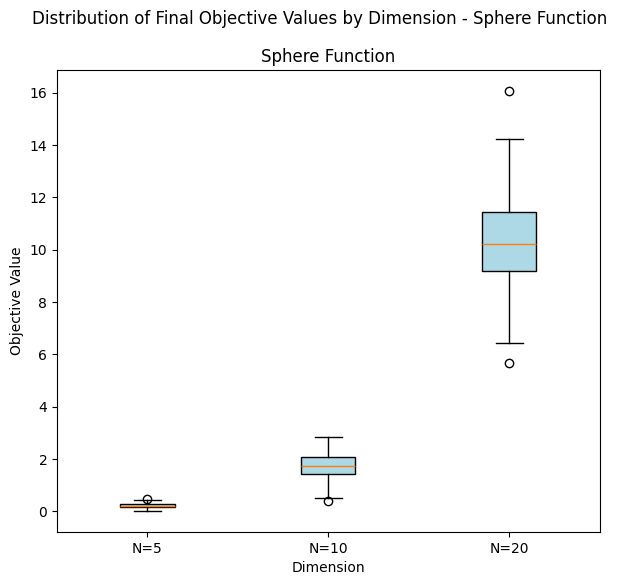

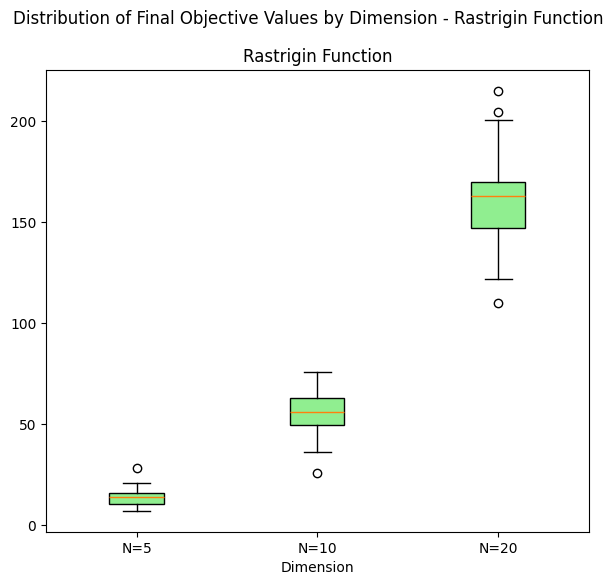

In [21]:
def plot_results(plot_results):
    # Sphere Function Plot
    fig1, axs1 = plt.subplots(figsize=(7, 6))
    fig1.suptitle('Distribution of Final Objective Values by Dimension - Sphere Function')
    colors = ['blue', 'green', 'red']
    labels = ['N=5', 'N=10', 'N=20']
    axs1.set_title('Sphere Function')
    axs1.boxplot([plot_results[dim]['Sphere'] for dim in dimensions], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs1.set_xticklabels(labels)
    axs1.set_xlabel('Dimension')
    axs1.set_ylabel('Objective Value')
    plt.show()

    # Rastrigin Function Plot
    fig2, axs2 = plt.subplots(figsize=(7, 6))
    fig2.suptitle('Distribution of Final Objective Values by Dimension - Rastrigin Function')
    axs2.set_title('Rastrigin Function')
    axs2.boxplot([plot_results[dim]['Rastrigin'] for dim in dimensions], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    axs2.set_xticklabels(labels)
    axs2.set_xlabel('Dimension')
    plt.show()

plot_results(results)